## DCGAN using MNIST

In [1]:
# Import Dependencies
import numpy as np

# Dataset
from keras.datasets.mnist import load_data

from keras.models import Sequential

# Common Layers
from keras.layers import Dense, Activation, BatchNormalization, Reshape, Flatten 

# Layers specific to Generator
from keras.layers import Conv2DTranspose

# Layers specific to Discriminator
from keras.layers import Conv2D, LeakyReLU 

# Use this to pass an element-wise TensorFlow/Theano/CNTK function as an activation
import keras.backend as k

# Train Test Split
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


For this code, I'll be starting with the MNIST Dataset and then using the same architecture on other datasets like CIFAR, Faces Dataset etc.

The MNIST dataset will be laoded using the Keras "load_data" functionality. When we load the data using this, it is loaded into training and test set as a tuple of each. i.e. a tuple of training features and labels and a tuple of test features and labels.

### Load Dataset and Visualize Data

In [2]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
# Get Data Analysis
print('Training Data: \n')
print('Num. Features: ',len(X_train)), print('Num. Labels: ',len(y_train))
print('Shape of Features: ',X_train.shape), print('Shape of Labels: ',y_train.shape)
print('\n\n')

print('Test Data: \n')
print('Num. Features: ',len(X_test)), print('Num. Labels: ',len(y_test))
print('Shape of Features: ',X_test.shape), print('Shape of Labels: ', y_test.shape)

Training Data: 

Num. Features:  60000
Num. Labels:  60000
Shape of Features:  (60000, 28, 28)
Shape of Labels:  (60000,)



Test Data: 

Num. Features:  10000
Num. Labels:  10000
Shape of Features:  (10000, 28, 28)
Shape of Labels:  (10000,)


(None, None)

In [4]:
# Shape of One Image
rand_idx = np.random.randint(0, len(X_train), 1)
print('Shape of one Image: ', X_train[rand_idx].shape)

Shape of one Image:  (1, 28, 28)


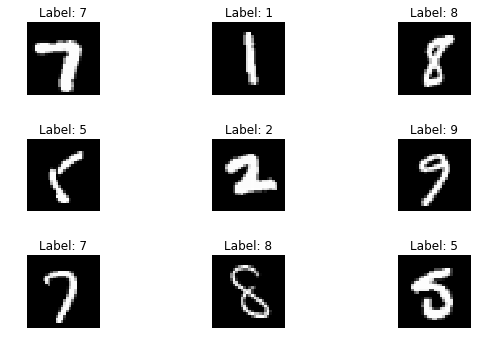

In [5]:
# Visualize Images
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,5))
for i in range(0,3):
    for j in range(0,3):
        idx = np.random.randint(0, len(X_train), 1)
        idx = idx[0]
        ax[i,j].imshow(X_train[idx], cmap='gray')
        ax[i,j].set_axis_off()
        ax[i,j].title.set_text('Label: {}'.format(y_train[idx]))
        plt.tight_layout()

## Data Preprocessing

According to the paper, the input images were scaled to the range of the tanh activation function i.e. [-1,1]. Using this ensures that each input parameter i.e. the pixels in the case of images have a similar data distribution. This helps as it speeds up the convergence while training the model. So, next, we'll write a function that does just that.

In [6]:
# Taking a random image and looking at its pixel values
idx = np.random.randint(0, len(X_train), 1)
print('Image Index No.: ', idx)
print('\nImage Pixel Values [Before Normalization]: \n\n',X_train[idx])
print('\n\n Shape of Image: ',X_train[idx].shape)

Image Index No.:  [24782]

Image Pixel Values [Before Normalization]: 

 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   9 125 240  50
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 254 254  87
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 254 254  87
     0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  74 254 254  87
     0   0   0   0 

In [7]:
# Function to apply Normalization similar to tanh activation function range i.e. [-1,1]
def normalize_images(img):
    # Reshape Image from 28,28,1 to -1,28,28,1
    img = img.reshape(-1,28,28,1)
    img = np.float32(img)
    img = (img / 255 - 0.5) * 2
    img = np.clip(img, -1,1)
    return img

In [10]:
# Test the Function
img = normalize_images(X_train[3337])
print('Normalized Pixel Values: \n\n', img)
print('\n\n Shape of Normalized Image: ', img.shape)

Normalized Pixel Values: 

 [[[[-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]
   [-1.        ]]

  [[-1.        ]

In [11]:
# Normalize the Training and Test Features
X_train = normalize_images(X_train)
X_test = normalize_images(X_test)

## DCGAN Generator Architecture

The paper describes the DCGAN Architecture as shown in the following image:

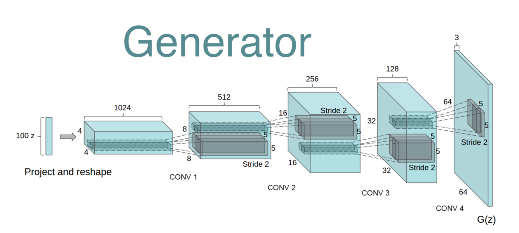

In [12]:
# Display Generator Architecture
from IPython.display import Image
Image(filename='./Images/generator.png', width=900) 

The Generator for DCGAN has the following components:

**1. Input Layer [Dense]:**

This layer is where we provide the noise Input using which, over time and training the Generator is able to convert into an image at the output.

This layer is a Fully Connected or Dense layer that takes the pixels of the image in the current case. Since, we know that the MNIST Image has a shape of [28,28,1], so the total number of Input values is 28*28 = 784.

**2. Reshape:**

Before giving the data into the Transposed Convolution function, we need to resize the input data so that we can apply convolution operation on it.

Input Shape: **[1,784]**

After Reshaping, Input to Transpose Convolution Function: **[4,4,1024]**

**3. 2-D Transposed Convolution [Conv2DTranspose]:**

As per the architecture of DCGAN mentioned in the paper, the Generator performs a series of Transposed Convolutions after getting the data from the dense layer and at the final layer we get a 64x64 image from these high level representations.

**4. Activation Functions [ReLU, Tanh]:**

As per the paper, the Transposed Convolution layers use the ReLU activation function whereas we use a tanh activation function for the final layer. Using the bounded activation function allows the model to learn more quickly to saturate and cover the color space of the training distribution.

So, let's define the Generator Function.

In [17]:
# Generator
def generator(inputSize, leakSlope):
    generator_model = Sequential()
    # Input Dense Layer
    generator_model.add(Dense(784, input_shape=(inputSize,)))
    # Reshape the Input, apply Batch Normalization and Leaky ReLU Activation.
    generator_model.add(Reshape(target_shape=(4,4,1024)))
    generator_model.add(BatchNormalization())
    generator_model.add(LeakyReLU(alpha=leakSlope))
    
    # First Transpose Convolution Layer
    generator_model.add(Conv2DTranspose(filters=512, kernel_size=5, strides=2, padding='same'))
    generator_model.add(BatchNormalization())
    generator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Second Transpose Convolution Layer
    generator_model.add(Conv2DTranspose(filters=256, kernel_size=5, strides=2, padding='same'))
    generator_model.add(BatchNormalization())
    generator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Third Transpose Convolution Layer
    generator_model.add(Conv2DTranspose(filters=128, kernel_size=5, strides=2, padding='same'))
    generator_model.add(BatchNormalization())
    generator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Since, we are using MNIST Data which has only 1 channel, so filter for Generated Image = 1
    generator_model.add(Conv2DTranspose(filters=1, kernel_size=5, strides=2, padding='same'))
    generator_model.add(Activation('tanh'))
    
    return generator_model

## DCGAN Discriminator Architecture

The paper describes the DCGAN Architecture as shown in the following image:

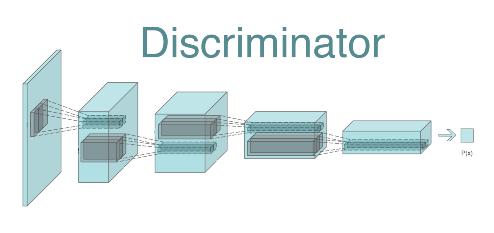

In [18]:
# Display Discriminator Architecture
from IPython.display import Image
Image(filename='./Images/discriminator.png', width=900) 

The discriminator for DCGAN has the following components:

**1. 2-D Convolution [Conv2D]:**

Since, the aim of the discriminator is to classify images between real and fake, it takes in the complete image generated by the generator and try to tell that whether it is a true or a fake image. Hence, CNN comes into play as they are the state of the art networks for image classification. So, we use Convolution filters for the first 3 layers as opposed to Transpose Convolution in the Generator.


**2. Activation Functions [LeakyReLU]:**

As per the paper, the Convolution layers use the LeakyReLU activation function throughout the discriminator layers. Using the bounded activation function allows the model to learn more quickly to saturate and cover the color space of the training distribution.

In [19]:
# Discriminator
def discriminator(leakSlope):
    discriminator_model = Sequential()
    
    # Input and First Conv2D Layer
    discriminator_model.add(Conv2D(filters=64, kernel_size=5, strides=2, padding='same', input_shape=(28,28,1)))
    discriminator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Second Conv2D Layer
    discriminator_model.add(Conv2D(filters=128, kernel_size=5, strides=2, padding='same'))
    discriminator_model.add(BatchNormalization())
    discriminator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Third Conv2D Layer
    discriminator_model.add(Conv2D(filters=256, kernel_size=5, strides=2, padding='same'))
    discriminator_model.add(BatchNormalization())
    discriminator_model.add(LeakyReLU(alpha=leakSlope))
    
    # Output Layer
    discriminator_model.add(Flatten())
    discriminator_model.add(Dense(1))
    discriminator_model.add(Activation('sigmoid'))
    
    return discriminator_model